**Gender Classification Model Using Deep Learning**

At first, we are going to download the datasets and unzip the datas to Colab using wget and unzip commands.

In [ ]:
#Download Data to COlab
!wget "http://info.iut-bm.univ-fcomte.fr/staff/couturie/images.zip"

--2020-11-06 06:32:45--  http://info.iut-bm.univ-fcomte.fr/staff/couturie/images.zip
Resolving info.iut-bm.univ-fcomte.fr (info.iut-bm.univ-fcomte.fr)... 193.52.61.138
Connecting to info.iut-bm.univ-fcomte.fr (info.iut-bm.univ-fcomte.fr)|193.52.61.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874109 (2.7M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]   2.74M  1.44MB/s    in 1.9s    

2020-11-06 06:32:49 (1.44 MB/s) - ‘images.zip’ saved [2874109/2874109]



In [ ]:
!apt install unzip
#Extract Dataset
!unzip images.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Archive:  images.zip
   creating: train/
   creating: train/men/
  inflating: train/men/121261.jpg    
  inflating: train/men/121142.jpg    
  inflating: train/men/121011.jpg    
  inflating: train/men/121031.jpg    
  inflating: train/men/121086.jpg    
  inflating: train/men/121056.jpg    
  inflating: train/men/121003.jpg    
  inflating: train/men/121013.jpg    
  inflating: train/men/121042.jpg    
  inflating: train/men/121103.jpg    
  inflating: train/men/121107.jpg    
  inflating: train/men/121241.jpg    
  inflating: train/men/121187.jpg    
  inflating: train/men/121051.jpg    
  inflating: train/men/121197.jpg    
  inflating: train/men/121074.jpg    
  inflating: train/men/121192.jpg    
  inflating: train/men/121178.jpg    
  inflating: train/men/121100.jpg    


In [ ]:
# import necessary packages
'''import matplotlib
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array,array_to_img, load_img
from keras.utils import to_categorical
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob
import pathlib

data_dir = "train"
data_dir = pathlib.Path(data_dir)
!ls
!ls train'''

'import matplotlib\nfrom keras.preprocessing.image import ImageDataGenerator\nfrom keras.optimizers import Adam\nfrom keras.preprocessing.image import img_to_array,array_to_img, load_img\nfrom keras.utils import to_categorical\nfrom keras.utils import plot_model\nfrom sklearn.model_selection import train_test_split\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport random\nimport cv2\nimport os\nimport glob\nimport pathlib\n\ndata_dir = "train"\ndata_dir = pathlib.Path(data_dir)\n!ls\n!ls train'

In [ ]:
'''train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        'validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
'''

Found 206 images belonging to 2 classes.
Found 206 images belonging to 2 classes.


In [ ]:
'''from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))




# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])'''


In [ ]:
'''class_names = ['Men', "Women"]'''

In [ ]:
#num_train_examples = metadata.splits['train'].num_examples
#num_test_examples = metadata.splits['test'].num_examples
#print('Number of training copies: {}'.format(num_train_examples))
#print('Number of test instances: {}'.format(num_test_examples))

**Let's Start!**


**1. Import the necessary packages**

In [ ]:
from __future__ import print_function
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline  
import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau, EarlyStopping

**2.  Define some parameters for generating the model.**

*   Switch the "image_data_format" parameter
*   For "tensorflow "or "cntk" backends, it should be “channels_last”. For “theano”, it should be “channels_first”. As we are not using tensorflow that's why we use “channels_first”.



In [ ]:
# dimensions of our images.
img_width, img_height = 178, 218

train_data_dir = 'train'
validation_data_dir = 'validation'
nb_train_samples = 206
nb_validation_samples = 206
epochs = 50
batch_size = 16

#switch the "image_data_format" parameter
#For "tensorflow "or "cntk" backends, it should be “channels_last”. For “theano”, it should be “channels_first”.
#as we are not using tensorflow that's why we use “channels_first”
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

**3. Creating the model with the network architecture.**

In [ ]:
def deep_model() :
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  return(model)


**4. Augmentation Configuration**

In [ ]:

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 206 images belonging to 2 classes.
Found 206 images belonging to 2 classes.


 **5. Model Validation**

In [ ]:
model = deep_model()  
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
12/12 [==============================] - 12s 990ms/step - loss: 2.1473 - accuracy: 0.4684 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 2/50
12/12 [==============================] - 12s 974ms/step - loss: 0.6731 - accuracy: 0.5947 - val_loss: 0.7234 - val_accuracy: 0.5052
Epoch 3/50
12/12 [==============================] - 12s 968ms/step - loss: 0.6713 - accuracy: 0.5789 - val_loss: 0.6361 - val_accuracy: 0.7708
Epoch 4/50
12/12 [==============================] - 12s 969ms/step - loss: 0.6510 - accuracy: 0.6632 - val_loss: 0.7463 - val_accuracy: 0.5365
Epoch 5/50
12/12 [==============================] - 12s 966ms/step - loss: 0.5963 - accuracy: 0.6789 - val_loss: 1.1343 - val_accuracy: 0.5208
Epoch 6/50
12/12 [==============================] - 12s 966ms/step - loss: 0.6282 - accuracy: 0.6947 - val_loss: 0.5504 - val_accuracy: 0.7708
Epoch 7/50
12/12 [==============================] - 12s 968ms/step - loss: 0.4890 - accuracy: 0.7842 - val_loss: 0.4652 - val_accuracy: 0.7865

In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience= 5)
model = deep_model()  
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, callbacks=[es])

Epoch 1/50
12/12 [==============================] - 12s 985ms/step - loss: 1.0027 - accuracy: 0.4947 - val_loss: 0.6971 - val_accuracy: 0.4948
Epoch 2/50
12/12 [==============================] - 12s 964ms/step - loss: 0.6730 - accuracy: 0.6526 - val_loss: 0.8251 - val_accuracy: 0.4948
Epoch 3/50
12/12 [==============================] - 12s 967ms/step - loss: 0.6941 - accuracy: 0.6263 - val_loss: 0.5972 - val_accuracy: 0.7344
Epoch 4/50
12/12 [==============================] - 12s 967ms/step - loss: 0.6126 - accuracy: 0.6316 - val_loss: 0.5956 - val_accuracy: 0.6927
Epoch 5/50
12/12 [==============================] - 12s 973ms/step - loss: 0.6034 - accuracy: 0.6737 - val_loss: 0.5300 - val_accuracy: 0.7656
Epoch 6/50
12/12 [==============================] - 12s 978ms/step - loss: 0.5649 - accuracy: 0.7158 - val_loss: 0.5552 - val_accuracy: 0.6719
Epoch 7/50
12/12 [==============================] - 12s 967ms/step - loss: 0.5979 - accuracy: 0.7421 - val_loss: 0.5157 - val_accuracy: 0.7969

In [ ]:
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=50)

model = deep_model()  
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, callbacks=[rlrop])

Epoch 1/50
12/12 [==============================] - 13s 1s/step - loss: 1.4079 - accuracy: 0.5579 - val_loss: 0.6869 - val_accuracy: 0.5156
Epoch 2/50
12/12 [==============================] - 12s 1s/step - loss: 0.7450 - accuracy: 0.5368 - val_loss: 0.6759 - val_accuracy: 0.5781
Epoch 3/50
12/12 [==============================] - 12s 986ms/step - loss: 0.6648 - accuracy: 0.5842 - val_loss: 0.6510 - val_accuracy: 0.6042
Epoch 4/50
12/12 [==============================] - 12s 982ms/step - loss: 0.6395 - accuracy: 0.6632 - val_loss: 0.6640 - val_accuracy: 0.5365
Epoch 5/50
12/12 [==============================] - 12s 986ms/step - loss: 0.6352 - accuracy: 0.6895 - val_loss: 0.5867 - val_accuracy: 0.7292
Epoch 6/50
12/12 [==============================] - 12s 981ms/step - loss: 0.6075 - accuracy: 0.6895 - val_loss: 0.5926 - val_accuracy: 0.7656
Epoch 7/50
12/12 [==============================] - 12s 986ms/step - loss: 0.5139 - accuracy: 0.7579 - val_loss: 0.5456 - val_accuracy: 0.7448
Epoch

**Define function to plot model accuracy**

In [ ]:
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img/'+str(i)+'-accuracy.jpg')
    plt.close(fig)

**Let's work with learning rate.**

When training deep neural networks, it is often useful to reduce learning rate as the training progresses. This can be done by using pre-defined learning rate schedules or adaptive learning rate methods.

**Learning Rate Schedules**

Learning rate schedules seek to adjust the learning rate during training by reducing the learning rate according to a pre-defined schedule. Common learning rate schedules include **time-based decay**, **step decay** and **exponential decay**. 



**Constant learning rate**

Constant learning rate is the default learning rate schedule in SGD optimizer in Keras. Momentum and decay rate are both set to zero by default. It is tricky to choose the right learning rate.

In [ ]:
def model1(lr): 
  # define model
  model1 = deep_model()

  # define SGD optimizer
  learning_rate = lr
  sgd = SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False) # set to default except lr

  # compile the model
  model1.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])

  # fit the model
  history1 = model1.fit(
      train_generator,
      steps_per_epoch=nb_train_samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=nb_validation_samples // batch_size)

  # plot model accuracy
  plot_fig(1, history1)

Epoch 1/50
12/12 [==============================] - 12s 968ms/step - loss: 0.6920 - accuracy: 0.5263 - val_loss: 0.6884 - val_accuracy: 0.5104
Epoch 2/50
12/12 [==============================] - 11s 951ms/step - loss: 0.6782 - accuracy: 0.5316 - val_loss: 0.6989 - val_accuracy: 0.4948
Epoch 3/50
12/12 [==============================] - 11s 955ms/step - loss: 0.6982 - accuracy: 0.4842 - val_loss: 0.6853 - val_accuracy: 0.5312
Epoch 4/50
12/12 [==============================] - 11s 951ms/step - loss: 0.6815 - accuracy: 0.5579 - val_loss: 0.6808 - val_accuracy: 0.5833
Epoch 5/50
12/12 [==============================] - 12s 970ms/step - loss: 0.6808 - accuracy: 0.5579 - val_loss: 0.6890 - val_accuracy: 0.5417
Epoch 6/50
12/12 [==============================] - 11s 954ms/step - loss: 0.6748 - accuracy: 0.5526 - val_loss: 0.6888 - val_accuracy: 0.5573
Epoch 7/50
12/12 [==============================] - 12s 963ms/step - loss: 0.6542 - accuracy: 0.6211 - val_loss: 0.6752 - val_accuracy: 0.5885

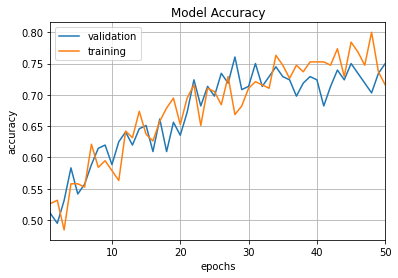

In [ ]:
#learning rate 0.01
model1(0.01)

Epoch 1/50
12/12 [==============================] - 12s 977ms/step - loss: 0.6993 - accuracy: 0.4737 - val_loss: 0.6947 - val_accuracy: 0.4896
Epoch 2/50
12/12 [==============================] - 12s 968ms/step - loss: 0.6956 - accuracy: 0.4895 - val_loss: 0.6925 - val_accuracy: 0.5104
Epoch 3/50
12/12 [==============================] - 12s 963ms/step - loss: 0.6880 - accuracy: 0.4895 - val_loss: 0.6925 - val_accuracy: 0.5312
Epoch 4/50
12/12 [==============================] - 12s 972ms/step - loss: 0.6938 - accuracy: 0.5211 - val_loss: 0.6921 - val_accuracy: 0.5573
Epoch 5/50
12/12 [==============================] - 12s 962ms/step - loss: 0.6849 - accuracy: 0.5684 - val_loss: 0.6899 - val_accuracy: 0.5625
Epoch 6/50
12/12 [==============================] - 12s 971ms/step - loss: 0.6894 - accuracy: 0.5316 - val_loss: 0.6899 - val_accuracy: 0.5677
Epoch 7/50
12/12 [==============================] - 12s 963ms/step - loss: 0.6868 - accuracy: 0.5158 - val_loss: 0.6894 - val_accuracy: 0.5781

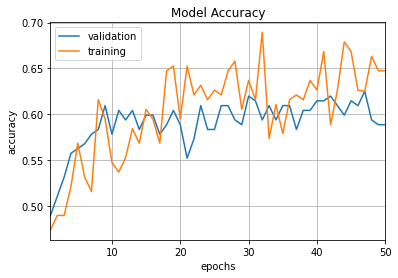

In [ ]:
#learning rate 0.001
model1(0.001)

Epoch 1/50
12/12 [==============================] - 12s 981ms/step - loss: 0.7008 - accuracy: 0.4947 - val_loss: 0.7009 - val_accuracy: 0.5000
Epoch 2/50
12/12 [==============================] - 12s 985ms/step - loss: 0.6948 - accuracy: 0.5158 - val_loss: 0.7027 - val_accuracy: 0.5000
Epoch 3/50
12/12 [==============================] - 13s 1s/step - loss: 0.7034 - accuracy: 0.4947 - val_loss: 0.6978 - val_accuracy: 0.5208
Epoch 4/50
12/12 [==============================] - 12s 994ms/step - loss: 0.6946 - accuracy: 0.4789 - val_loss: 0.7022 - val_accuracy: 0.4740
Epoch 5/50
12/12 [==============================] - 12s 972ms/step - loss: 0.6868 - accuracy: 0.5632 - val_loss: 0.6986 - val_accuracy: 0.5000
Epoch 6/50
12/12 [==============================] - 12s 973ms/step - loss: 0.6975 - accuracy: 0.4947 - val_loss: 0.6946 - val_accuracy: 0.5156
Epoch 7/50
12/12 [==============================] - 12s 979ms/step - loss: 0.6988 - accuracy: 0.5053 - val_loss: 0.6999 - val_accuracy: 0.4896
Ep

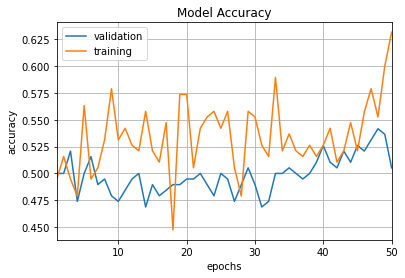

In [ ]:
#learning rate 0.0001
model1(0.0001)

**Time-Based Decay**

The mathematical form of time-based decay is lr = lr0/(1+kt) where lr, k are hyperparameters and t is the iteration number.

Epoch 1/50
12/12 [==============================] - 12s 991ms/step - loss: 0.6998 - accuracy: 0.4684 - val_loss: 0.6851 - val_accuracy: 0.5052
Epoch 2/50
12/12 [==============================] - 12s 981ms/step - loss: 0.6929 - accuracy: 0.4789 - val_loss: 0.6822 - val_accuracy: 0.5677
Epoch 3/50
12/12 [==============================] - 13s 1s/step - loss: 0.6780 - accuracy: 0.6211 - val_loss: 0.6728 - val_accuracy: 0.6615
Epoch 4/50
12/12 [==============================] - 12s 1s/step - loss: 0.6713 - accuracy: 0.6000 - val_loss: 0.6725 - val_accuracy: 0.6042
Epoch 5/50
12/12 [==============================] - 12s 975ms/step - loss: 0.6623 - accuracy: 0.6000 - val_loss: 0.6644 - val_accuracy: 0.6042
Epoch 6/50
12/12 [==============================] - 12s 975ms/step - loss: 0.6523 - accuracy: 0.6421 - val_loss: 0.6580 - val_accuracy: 0.6198
Epoch 7/50
12/12 [==============================] - 12s 972ms/step - loss: 0.6220 - accuracy: 0.6316 - val_loss: 0.6515 - val_accuracy: 0.6250
Epoch

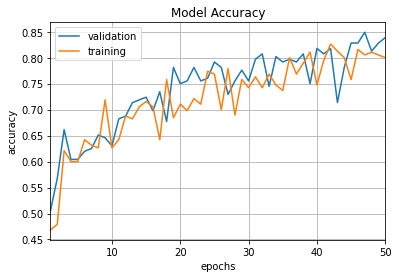

In [ ]:
# define model
model2 = deep_model()

# define SGD optimizer
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.5
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# compile the model
model2.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])

# fit the model
history2 = model2.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

# plot model accuracy
plot_fig(2, history2)

**Step Decay:**

Step decay schedule drops the learning rate by a factor every few epochs. A typical way is to to drop the learning rate by half every 10 epochs. To implement this in Keras, we can define a step decay function and use LearningRateScheduler callback to take the step decay function as argument and return the updated learning rates for use in SGD optimizer.

As a digression, a callback is a set of functions to be applied at given stages of the training procedure. We can use callbacks to get a view on internal states and statistics of the model during training. In our example, we create a custom callback by extending the base class keras.callbacks.Callback to record loss history and learning rate during the training procedure.

Epoch 1/50
12/12 [==============================] - 12s 1s/step - loss: 0.6978 - accuracy: 0.5417 - val_loss: 0.6926 - val_accuracy: 0.4948
Epoch 2/50
12/12 [==============================] - 13s 1s/step - loss: 0.6942 - accuracy: 0.5316 - val_loss: 0.6918 - val_accuracy: 0.5052
Epoch 3/50
12/12 [==============================] - 12s 980ms/step - loss: 0.6893 - accuracy: 0.5263 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 4/50
12/12 [==============================] - 12s 983ms/step - loss: 0.7011 - accuracy: 0.5895 - val_loss: 0.6933 - val_accuracy: 0.5052
Epoch 5/50
12/12 [==============================] - 12s 972ms/step - loss: 0.6960 - accuracy: 0.4737 - val_loss: 0.6931 - val_accuracy: 0.4688
Epoch 6/50
12/12 [==============================] - 12s 976ms/step - loss: 0.6946 - accuracy: 0.5158 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 7/50
12/12 [==============================] - 12s 975ms/step - loss: 0.6935 - accuracy: 0.5211 - val_loss: 0.6919 - val_accuracy: 0.5469
Epoch

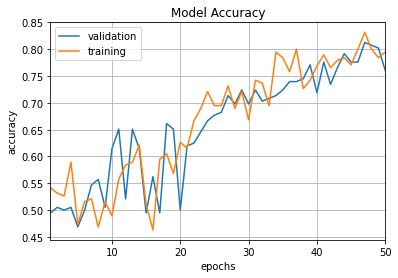

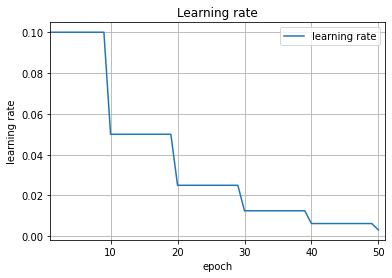

In [ ]:
# define model
model3 = deep_model()

# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model3.compile(loss="binary_crossentropy",optimizer=sgd, metrics=['accuracy'])

# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]

# fit the model
history3 = model3.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,callbacks=callbacks_list)

# plot model accuracy
plot_fig(3, history3)


# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),loss_history.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()
fig.savefig('img/learning-rate.jpg')
plt.close(fig)

**Exponential Decay**

Another common schedule is exponential decay. It has the mathematical form lr = lr0 * e^(−kt), where lr, k are hyperparameters and t is the iteration number. Similarly, we can implement this by defining exponential decay function and pass it to LearningRateScheduler. In fact, any custom decay schedule can be implemented in Keras using this approach. The only difference is to define a different custom decay function.

Epoch 1/50
12/12 [==============================] - 12s 963ms/step - loss: 0.7185 - accuracy: 0.5421 - val_loss: 0.6907 - val_accuracy: 0.5156
Epoch 2/50
12/12 [==============================] - 11s 953ms/step - loss: 0.6990 - accuracy: 0.4526 - val_loss: 0.6931 - val_accuracy: 0.5260
Epoch 3/50
12/12 [==============================] - 11s 945ms/step - loss: 0.6969 - accuracy: 0.4947 - val_loss: 0.6936 - val_accuracy: 0.4948
Epoch 4/50
12/12 [==============================] - 11s 943ms/step - loss: 0.6950 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
12/12 [==============================] - 11s 948ms/step - loss: 0.6959 - accuracy: 0.4632 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 6/50
12/12 [==============================] - 11s 943ms/step - loss: 0.6913 - accuracy: 0.5263 - val_loss: 0.6911 - val_accuracy: 0.5469
Epoch 7/50
12/12 [==============================] - 11s 947ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6894 - val_accuracy: 0.5521

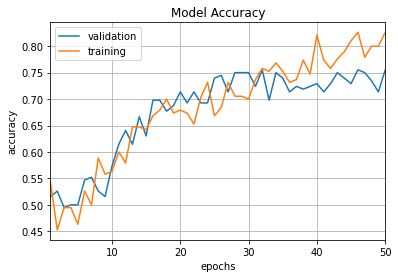

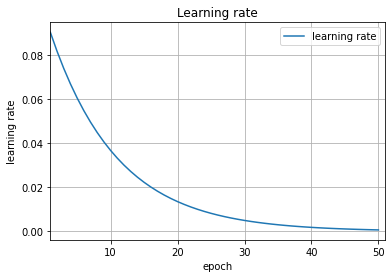

In [ ]:
# define deep model
model4 = deep_model()

# define SGD optimizer
momentum = 0.8
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False)

# compile the model
model4.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])

# define step decay function
class LossHistory_(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(exp_decay(len(self.losses)))
        print('lr:', exp_decay(len(self.losses)))

def exp_decay(epoch):
    initial_lrate = 0.1
    k = 0.1
    lrate = initial_lrate * np.exp(-k*epoch)
    return lrate

# learning schedule callback
loss_history_ = LossHistory_()
lrate_ = LearningRateScheduler(exp_decay)
callbacks_list_ = [loss_history_, lrate_]

# fit the model
history4 = model4.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,callbacks=callbacks_list_)

# plot model accuracy
plot_fig(4, history4)

# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),loss_history_.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()
fig.savefig('img/n-learning-rate.jpg')
plt.close(fig)


**Adaptive Learning Rate Methods**

The challenge of using learning rate schedules is that their hyperparameters have to be defined in advance and they depend heavily on the type of model and problem. Another problem is that the same learning rate is applied to all parameter updates. If we have sparse data, we may want to update the parameters in different extent instead.
Adaptive gradient descent algorithms such as Adagrad, Adadelta, RMSprop, Adam, provide an alternative to classical SGD.

**Adaptive gradient descent algorithms : Adagrad, Adadelta, RMSprop, Adam**

In [ ]:
# fit deep model using Adagrad optimizer
model5 = deep_model()
model5.compile(loss="binary_crossentropy",
              optimizer=Adagrad(lr=0.01, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history5 = model5.fit(train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

# fit deep model using Adadelta optimizer
model6 = deep_model()
model6.compile(loss="binary_crossentropy",
              optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history6 = model6.fit(train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

# fit deep model using RMSprop optimizer
model7 = deep_model()
model7.compile(loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history7 = model7.fit(train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

# fit deep model using Adam optimizer
model8 = deep_model()
model8.compile(loss="binary_crossentropy",
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history8 = model8.fit(train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
12/12 [==============================] - 12s 1s/step - loss: 0.7175 - accuracy: 0.4737 - val_loss: 0.6949 - val_accuracy: 0.4896
Epoch 2/50
12/12 [==============================] - 12s 1s/step - loss: 0.6893 - accuracy: 0.5316 - val_loss: 0.6960 - val_accuracy: 0.4844
Epoch 3/50
12/12 [==============================] - 12s 980ms/step - loss: 0.6891 - accuracy: 0.4947 - val_loss: 0.6940 - val_accuracy: 0.4896
Epoch 4/50
12/12 [==============================] - 12s 987ms/step - loss: 0.6887 - accuracy: 0.5421 - val_loss: 0.6892 - val_accuracy: 0.5469
Epoch 5/50
12/12 [==============================] - 12s 1s/step - loss: 0.6860 - accuracy: 0.5895 - val_loss: 0.6915 - val_accuracy: 0.5052
Epoch 6/50
12/12 [==============================] - 12s 998ms/step - loss: 0.6868 - accuracy: 0.5737 - val_loss: 0.6875 - val_accuracy: 0.5312
Epoch 7/50
12/12 [==============================] - 12s 989ms/step - loss: 0.6794 - accuracy: 0.6000 - val_loss: 0.6839 - val_accuracy: 0.5469
Epoch 8/

**Comparing Models Accuracy**

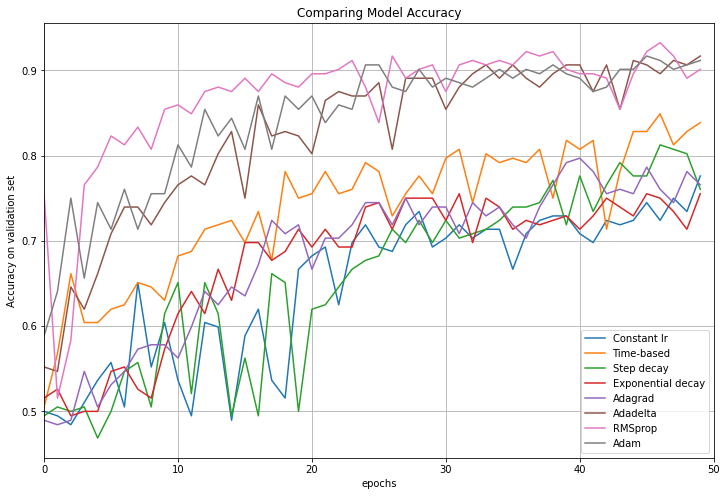

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs),history1.history['val_accuracy'],label='Constant lr')
plt.plot(range(epochs),history2.history['val_accuracy'],label='Time-based')
plt.plot(range(epochs),history3.history['val_accuracy'],label='Step decay')
plt.plot(range(epochs),history4.history['val_accuracy'],label='Exponential decay')
plt.plot(range(epochs),history5.history['val_accuracy'],label='Adagrad')
plt.plot(range(epochs),history6.history['val_accuracy'],label='Adadelta')
plt.plot(range(epochs),history7.history['val_accuracy'],label='RMSprop')
plt.plot(range(epochs),history8.history['val_accuracy'],label='Adam')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('Accuracy on validation set')
plt.grid(True)
plt.title("Comparing Model Accuracy")
plt.show()
fig.savefig('compare-accuracy.jpg')
plt.close(fig)